In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/ML projects/decision tree/cars.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [5]:
data.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [6]:
data[' brand'].unique()

array([' US.', ' Europe.', ' Japan.'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
data[' brand'] = LabelEncoder().fit_transform(data[' brand'])

In [8]:
data.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [9]:
data['mpg'] = data['mpg'].astype(float)
data[' cylinders'] = data[' cylinders'].astype(float)
data[' hp'] = data[' hp'].astype(float)
data[' time-to-60'] = data[' time-to-60'].astype(float)
data[' year'] = data[' year'].astype(float)

In [10]:
for i in range(len(data[' weightlbs'])):
  if data[' weightlbs'][i]==' ':
    data[' weightlbs'][i] = '0'

for i in range(len(data[' cubicinches'])):
  if data[' cubicinches'][i]==' ':
    data[' cubicinches'][i] = '0'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
data[' weightlbs']=data[' weightlbs'].astype(int)
data[' cubicinches']=data[' cubicinches'].astype(int)



In [12]:
data[' weightlbs']=data[' weightlbs'].replace(0,data[' weightlbs'].median())
data[' cubicinches']=data[' cubicinches'].replace(0,data[' cubicinches'].median())

In [13]:
x = len(data[' weightlbs'].unique())
x

239

In [14]:
data.shape

(261, 8)

In [15]:
feature = data.iloc[:,0:-1]

In [16]:
label = data.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
trainF,testF,trainL,testL = train_test_split(feature,label)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [21]:
model.fit(trainF,trainL)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
pred = model.predict(testF)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(testL,pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73        14
           1       0.67      0.36      0.47        11
           2       0.95      0.95      0.95        41

    accuracy                           0.83        66
   macro avg       0.75      0.72      0.72        66
weighted avg       0.84      0.83      0.82        66



In [26]:
cm = confusion_matrix(testL,pred)

In [27]:
import seaborn as sns

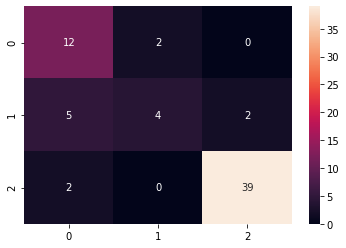

In [28]:
sns.heatmap(cm,fmt='d',annot=True)